In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import sys
from io import StringIO
import os
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/dataset3/train.csv
/kaggle/input/dataset3/test.csv


Importing the data: **train and test datasets**

In [2]:
#I put the file_path of my input data in variables to follows some best practices
file_path_train="/kaggle/input/dataset3/train.csv"
file_path_test="/kaggle/input/dataset3/test.csv"

#creating dataframe for both of the datasets
df_tr = pd.read_csv(file_path_train)
df_test = pd.read_csv(file_path_test)


In [3]:
#Cheching null elements
print(df_tr.isnull().sum())
print(df_test.isnull().sum())

ID                                    0
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0


Deleting the **ID column** from the dataframes

In [4]:
#before of deleting ID column, i keeep it in the variable ID
ID=df_test.iloc[:, 0]
df_tr= df_tr.drop("ID", axis=1)

df_test= df_test.drop("ID", axis=1)


In [5]:
df_test.shape

(116203, 54)

**Preprocessing phase**

Splitting the dataframe in **X(input data) and Y(labels)**

In [6]:
#splitting the training dataframe in X and Y(label)
Y_tr= df_tr.iloc[:, 54] 
X_tr= df_tr.iloc[:, 0:54] 


X_test= df_test


Splitting training dataset in **training+test**

In [7]:
#splitting the data_training  in data_training and another data_test (labeled)
#to evaluate the models
(X_training,X_training_test,Y_training,Y_training_test) = train_test_split(X_tr, Y_tr, test_size=0.2, random_state=2)

Checking, with graphs, if the dataset is unbalanced

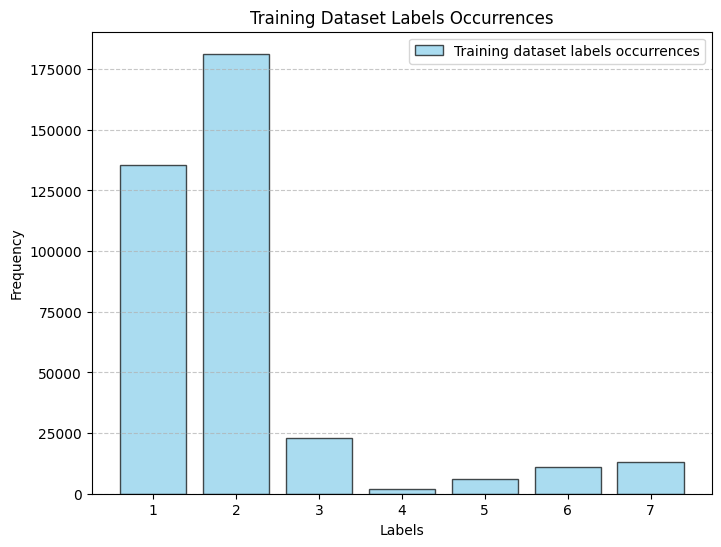

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming Y_training contains training labels (ranging from 1 to 7)
plt.figure(figsize=(8, 6))

# Count the occurrences of each label
label_counts = [np.sum(Y_training == label) for label in range(1, 8)]

# Plot the histogram with labels ranging from 1 to 7
plt.bar(range(1, 8), label_counts, color='skyblue', edgecolor='black', align='center', alpha=0.7)

plt.title('Training Dataset Labels Occurrences')
plt.xlabel('Labels')
plt.ylabel('Frequency')

plt.xticks(range(1, 8))
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add a legend
plt.legend(['Training dataset labels occurrences'])

plt.show()


We can see that the training dataset is **unbalanced**. 

I want to calculate the occurences of labeled 4 examples, to make an idea of the possible oversampling i can do 

In [9]:
# Assuming Y_training contains your training labels
label_to_count = 4  # The label you want to count

# Count the number of examples labeled with 0
count_label_4 = np.sum(Y_training == label_to_count)

print(f"Number of examples labeled with {label_to_count}: {count_label_4}")

# Initialize a dictionary to store the count of each label
label_counts = {}

# Iterate through the labels in Y_training_downsampled
for label in Y_training:
    if label in label_counts:
        label_counts[label] += 1
    else:
        label_counts[label] = 1

# Print the count of each label
for label, count in label_counts.items():
    print(f"Label {label}: {count} examples")




Number of examples labeled with 4: 1764
Label 1: 135564 examples
Label 2: 181339 examples
Label 7: 13071 examples
Label 6: 11151 examples
Label 3: 22865 examples
Label 5: 6093 examples
Label 4: 1764 examples


Now, i will do the same with the test dataset splitted by the original training dataset. In this way, i can see if there is an equal distribution, like we are expecting to see (we have splitted the dataset using train_test_split function)

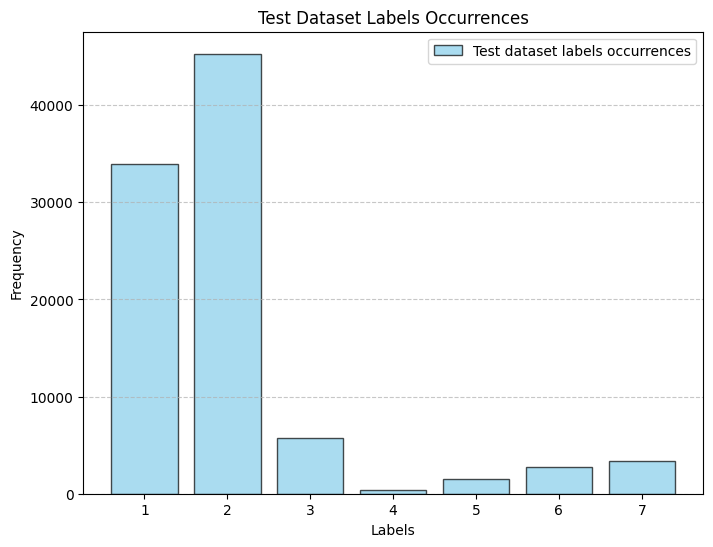

In [10]:
# Assuming Y_training_test contains training labels (ranging from 1 to 7)
plt.figure(figsize=(8, 6))

# Count the occurrences of each label
label_counts = [np.sum(Y_training_test == label) for label in range(1, 8)]

# Plot the histogram with labels ranging from 1 to 7
plt.bar(range(1, 8), label_counts, color='skyblue', edgecolor='black', align='center', alpha=0.7)

plt.title('Test Dataset Labels Occurrences')
plt.xlabel('Labels')
plt.ylabel('Frequency')

plt.xticks(range(1, 8))
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add a legend
plt.legend(['Test dataset labels occurrences'])

plt.show()


**UPSAMPLING DATA** (this choice will not bring results, I will use downsampling for the 1,2 labeled examples)

In [11]:
import numpy as np
from sklearn.utils import resample

# Concatenate X_training and Y_training to ensure alignment during upsampling
train_data = np.column_stack((X_training, Y_training))

# Separate the data into classes based on the label (assuming labels range from 1 to 7)
class_data = [train_data[train_data[:, -1] == label] for label in range(1, 8)]

# Find the class with the maximum number of samples
max_samples = max(len(class_data[label - 1]) for label in range(1, 8))

# Upsample each class to have the same number of samples as the maximum class
upsampled_data = []
for label in range(1, 8):
    class_samples = class_data[label - 1]
    upsampled_class = resample(class_samples, n_samples=max_samples, random_state=42)
    upsampled_data.append(upsampled_class)

# Combine the upsampled data for all classes
upsampled_data = np.vstack(upsampled_data)

# Split the upsampled data back into X_training and Y_training
X_training_upsampled = upsampled_data[:, :-1]
Y_training_upsampled = upsampled_data[:, -1]

# Now, you can do the same for X_training_test and Y_training_test
test_data = np.column_stack((X_training_test, Y_training_test))

class_data_test = [test_data[test_data[:, -1] == label] for label in range(1, 8)]

upsampled_data_test = []
for label in range(1, 8):
    class_samples_test = class_data_test[label - 1]
    upsampled_class_test = resample(class_samples_test, n_samples=max_samples, random_state=42)
    upsampled_data_test.append(upsampled_class_test)

upsampled_data_test = np.vstack(upsampled_data_test)

X_training_test_upsampled = upsampled_data_test[:, :-1]
Y_training_test_upsampled = upsampled_data_test[:, -1]


creating dataframes from arrays

In [12]:
X_training_upsampled_df = pd.DataFrame(X_training_upsampled, columns=X_training.columns)
X_training_test_upsampled_df = pd.DataFrame(X_training_test_upsampled, columns=X_training_test.columns)
Y_training_upsampled_df = pd.DataFrame(Y_training_upsampled, columns=['label'])
Y_training_test_upsampled_df = pd.DataFrame(Y_training_test_upsampled, columns=['label'])


Now i check with the same histograms the new datasets

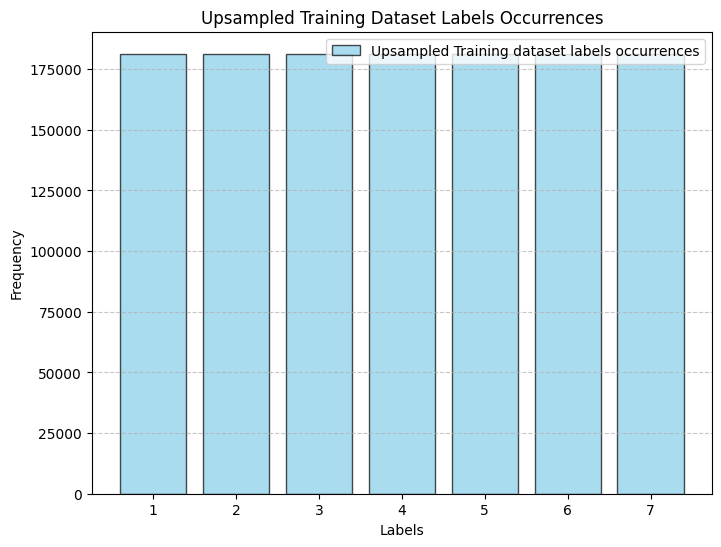

In [13]:
plt.figure(figsize=(8, 6))

# Count the occurrences of each label
label_counts = [np.sum(Y_training_upsampled == label) for label in range(1, 8)]

# Plot the histogram with labels ranging from 1 to 7
plt.bar(range(1, 8), label_counts, color='skyblue', edgecolor='black', align='center', alpha=0.7)

plt.title('Upsampled Training Dataset Labels Occurrences')
plt.xlabel('Labels')
plt.ylabel('Frequency')

plt.xticks(range(1, 8))
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add a legend
plt.legend(['Upsampled Training dataset labels occurrences'])

plt.show()


Normalizing the data with **Standard Scaler**

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_tr_norm= pd.DataFrame(scaler.fit_transform(X_training), columns=X_training.columns)

X_tr_test_norm= pd.DataFrame(scaler.fit_transform(X_training_test), columns=X_training_test.columns)
X_test_norm= pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns)


# **Models Training Phase**
# 
# Implementation of **Classifiers**

First Classifier: **DecisionTreeClassifier**

In [15]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
clf.fit(X_tr_norm, Y_training)

# Predict on the test data
y_pred = clf.predict(X_tr_test_norm)

# Calculate the macro F1 score
macro_f1 = f1_score(Y_training_test, y_pred, average='macro')

print(f"Macro F1 Score: {macro_f1}")


Macro F1 Score: 0.8886987766772771


Having already a 0.889 F1 score, I try to predict **testing dataset**

In [16]:
test_prediciton=clf.predict(X_test_norm)

Exporting in an **Output file**

In [17]:
file=pd.DataFrame({'ID':ID,'Cover_Type':test_prediciton})
file.to_csv('sub.csv',index=False)

Now i want to try with the **Upsampled data**. The first thing is to normalize the upsampled datasets(training and test). 
**Standard scaler normalizatin on upsampled data**

In [18]:
scaler = StandardScaler()
X_up_tr_norm= pd.DataFrame(scaler.fit_transform(X_training_upsampled_df), columns=X_training_upsampled_df.columns)

X_up_tr_test_norm= pd.DataFrame(scaler.fit_transform(X_training_test_upsampled_df), columns=X_training_test_upsampled_df.columns)

Training **again** the **DecisionTreeClassifier** with **upsampled** data

In [19]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
clf.fit(X_up_tr_norm, Y_training_upsampled_df)

# Predict on the test data
y_pred = clf.predict(X_up_tr_test_norm)

# Calculate the macro F1 score
macro_f1 = f1_score(Y_training_test_upsampled_df, y_pred, average='macro')

print(f"Macro F1 Score: {macro_f1}")
Y_training


Macro F1 Score: 0.8756467183302549


58286     1
183756    2
127086    1
455674    2
328072    7
         ..
437782    7
95816     1
203245    1
100879    2
351400    3
Name: Cover_Type, Length: 371847, dtype: int64

Trying **other classifiers**. I will do both of combinations(with upsampled data and original data) for each of the calssifiers

I'm having trouble with the training of the calssifiers. I want to reduce the **complexity** of the "problem". 
Basically i want to **reduce** the **total amount** of the examples. To do this, I will **reduce** the number of examples of Label **1** and Label **2**.  
I want also balance the datasets, so i will use **SMOTE** to increase the number of examples labeled as 3,4,5,6,7  

In [21]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

# Phase 1: Select 25,000 examples with feature extraction
num_desired_examples = 25000
X_selected = []
Y_selected = []

# Convert Y_training to a one-dimensional array
Y_training = Y_training.ravel()

# Select examples from class 1 and class 2 to meet the desired count
for label in [1, 2]:
    class_samples = X_tr_norm[Y_training == label]
    num_samples = min(num_desired_examples, len(class_samples))  # Allow for up to 45,000 examples each
    selected_samples = resample(class_samples, n_samples=num_samples, random_state=42)
    X_selected.append(selected_samples)
    Y_selected.extend([label] * num_samples)

# Combine the selected examples
X_selected = np.vstack(X_selected)
Y_selected = np.array(Y_selected)

# Phase 2: Balance classes 3 to 7 using SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Filter examples from classes 3 to 7 directly using boolean indexing
X_minority = X_tr_norm[np.isin(Y_training, [3, 4, 5, 6, 7])]
Y_minority = Y_training[np.isin(Y_training, [3, 4, 5, 6, 7])]

# Apply SMOTE to balance classes 3 to 7
X_balanced, Y_balanced = smote.fit_resample(X_minority, Y_minority)

# Concatenate the selected examples from Phase 1 with balanced examples from Phase 2
X_final = np.vstack([X_selected, X_balanced])
Y_final = np.hstack([Y_selected, Y_balanced])

# Shuffle the final dataset
shuffle_indices = np.arange(len(Y_final))
np.random.shuffle(shuffle_indices)
X_final = X_final[shuffle_indices]
Y_final = Y_final[shuffle_indices]

# Check the distribution of classes in the final dataset
class_counts = np.bincount(Y_final)
print("Class Distribution in the Final Dataset:")
for label, count in enumerate(class_counts):
    print(f"Label {label}: {count} examples")

X_final_df = pd.DataFrame(X_final, columns=X_training.columns)


Class Distribution in the Final Dataset:
Label 0: 0 examples
Label 1: 25000 examples
Label 2: 25000 examples
Label 3: 22865 examples
Label 4: 22865 examples
Label 5: 22865 examples
Label 6: 22865 examples
Label 7: 22865 examples


# The graph will show the new occurrencies of the examples for each label

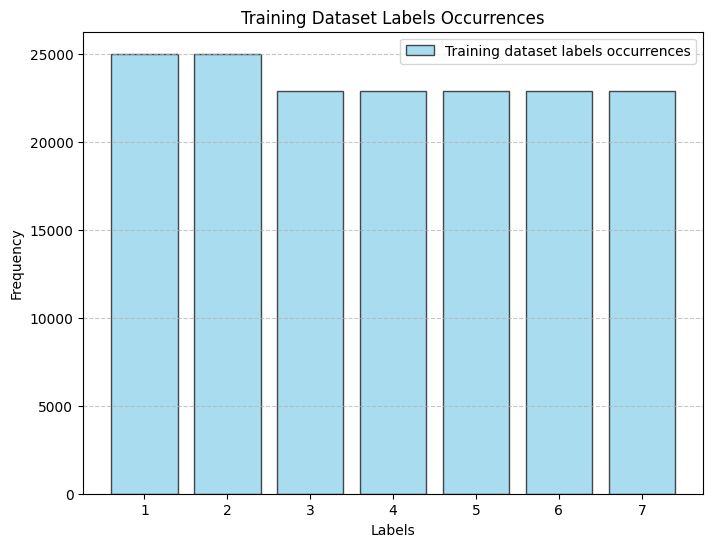

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming Y_training contains training labels (ranging from 1 to 7)
plt.figure(figsize=(8, 6))

# Count the occurrences of each label
label_counts = [np.sum(Y_final == label) for label in range(1, 8)]

# Plot the histogram with labels ranging from 1 to 7
plt.bar(range(1, 8), label_counts, color='skyblue', edgecolor='black', align='center', alpha=0.7)

plt.title('Training Dataset Labels Occurrences')
plt.xlabel('Labels')
plt.ylabel('Frequency')

plt.xticks(range(1, 8))
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add a legend
plt.legend(['Training dataset labels occurrences'])

plt.show()


As we can see, the dataset is way **more balanced**

In [23]:
# Initialize a dictionary to store the count of each label
label_counts = {}

# Iterate through the labels in Y_training_downsampled
for label in Y_final:
    if label in label_counts:
        label_counts[label] += 1
    else:
        label_counts[label] = 1

# Print the count of each label
for label, count in label_counts.items():
    print(f"Label {label}: {count} examples")


Label 7: 22865 examples
Label 2: 25000 examples
Label 5: 22865 examples
Label 4: 22865 examples
Label 6: 22865 examples
Label 1: 25000 examples
Label 3: 22865 examples


In [24]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=15)

clf.fit(X_final_df, Y_final)

# Predict on the test data
y_pred = clf.predict(X_tr_test_norm)

# Calculate the macro F1 score
macro_f1 = f1_score(Y_training_test, y_pred, average='macro')

print(f"Macro F1 Score: {macro_f1}")

Macro F1 Score: 0.790899992307838


# Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression



clf = LogisticRegression(random_state=15, max_iter=1500, penalty='l2', C=1.0)

# Fit the model on the training data
clf.fit(X_final_df, Y_final)

# Predict on the test data (use X_tr_test_norm)
y_pred = clf.predict(X_tr_test_norm)

# Calculate the macro F1 score
macro_f1 = f1_score(Y_training_test, y_pred, average='macro')

print(f"Macro F1 Score: {macro_f1}")


Macro F1 Score: 0.5059969759553066


# KNN Classifier

In [25]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_final_df, Y_final)

y_pred = knn.predict(X_tr_test_norm)

macro_f1 = f1_score(Y_training_test, y_pred, average='macro')

print(f"Macro F1 Score: {macro_f1}")


Macro F1 Score: 0.7478833866417129


In [ ]:
from sklearn.model_selection import RandomizedSearchCV


# Define the hyperparameter grid
param_grid = {
    'n_neighbors': [4, 6, 8],
    'algorithm': ['auto', 'kd_tree'],
    'leaf_size': [15,25]  # Adjust the leaf_size values as needed
}
knn = KNeighborsClassifier()
random_search = RandomizedSearchCV(
    knn, param_distributions=param_grid, n_iter=10, scoring='f1_macro', cv=5, random_state=42, n_jobs=-1
)
random_search.fit(X_final_df, Y_final)
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

best_knn = random_search.best_estimator_

y_pred = best_knn.predict(X_tr_test_norm)

# Calculate the macro F1 score for the best model
macro_f1 = f1_score(Y_training_test, y_pred, average='macro')

print(f"Best Model Macro F1 Score: {macro_f1}")

# Random forest

In [26]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=128,
                random_state=17,
                max_depth=19)

rf.fit(X_final_df, Y_final)

y_pred = rf.predict(X_tr_test_norm)

macro_f1 = f1_score(Y_training_test, y_pred, average='macro')

print(f"Macro F1 Score: {macro_f1}")


Macro F1 Score: 0.7822076590100692


# SVM

In [28]:
from sklearn.svm import SVC


svm = SVC(kernel='rbf', C=1.0, random_state=17)
svm.fit(X_final_df, Y_final)
y_pred = svm.predict(X_tr_test_norm)
macro_f1 = f1_score(Y_training_test, y_pred, average='macro')

print(f"Macro F1 Score: {macro_f1}")


Macro F1 Score: 0.5820187803712793


# GradientBoostingClassifier

In [30]:
from sklearn.ensemble import GradientBoostingClassifier

gb_classifier = GradientBoostingClassifier(
    n_estimators=150,  
    random_state=17
)

gb_classifier.fit(X_final_df, Y_final)

y_pred_gb = gb_classifier.predict(X_tr_test_norm)

macro_f1 = f1_score(Y_training_test, y_pred, average='macro')

print(f"Macro F1 Score: {macro_f1}")


Macro F1 Score: 0.5820187803712793
